Project Description:
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns
 
Predict - CGPA of a student based on different grades in four years.


In [54]:
#Import all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [3]:
#Read and study the provided dataset

#Create Dataframe object

df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [4]:
#Explore the dataset

df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [8]:
df.tail()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193
570,CS-97571,C,D,D,C,C,D+,B,C+,C,...,C+,C,B-,D,F,C-,B+,D,C-,1.753


In [6]:
df.shape

(571, 43)

In [7]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [9]:
print("The dimension of the dataset:",df.shape)
print(f"\nThe column headers in the dataset: {df.columns}")

The dimension of the dataset: (571, 43)

The column headers in the dataset: Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')


It could be observed that the dataset contains 571 rows and 43 columns now out of which one is the variable / feature of interest (CGPA) 

In [27]:
#Drop unnecessary feature like the seat nos

df = df.drop(['Seat No.'], axis=1)
df.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [28]:
#Check the description of the dataset

df.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


In [29]:
df.dtypes

PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

There are only 2 types of data in the dataset = float and object

In [30]:
#Check the null (missing) values in the dataset

df.isnull().sum()

PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

There are alot of missing values in nearly all the features 

In [19]:
#Further analysis of the missing data

total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head()

,Total,%
CS-406,85,14.9
CS-412,79,13.8
CS-423,14,2.5
CS-414,13,2.3
CS-419,13,2.3


* Other missing values that are not featuring here can easily be filled with fillna() as they are very small.
* CS-406 has the highest missing value as it repreents 14.9%, followed by CS-412 with 13.8%. They may require further investigation before further action is taken on them
* CS-423, -414 and -419 have approx 2.5% of missing values and can be filled with their common values

In [13]:
#Check for duplicates and drop if found to avoid redundancy 

df[df.duplicated()]

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA


No duplicate values was found

In [14]:
#Brief about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

<Axes: >

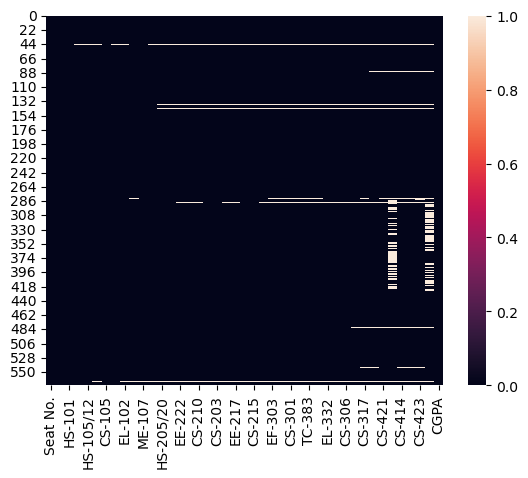

In [15]:
#Visualization using heatmap

sns.heatmap(df.isnull())

In [16]:
#Check the number of unique values in the dataset

df.nunique().to_frame("No. of unique values")

,No. of unique values
Seat No.,571
PH-121,13
HS-101,12
CY-105,13
HS-105/12,13
MT-111,13
CS-105,11
CS-106,13
EL-102,13
EE-119,12


In [17]:
#This value should be checked per column as follows:

for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Seat No.
CS-97001    1
CS-97384    1
CS-97378    1
CS-97379    1
CS-97380    1
           ..
CS-97185    1
CS-97184    1
CS-97183    1
CS-97182    1
CS-97571    1
Name: count, Length: 571, dtype: int64


PH-121
A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: count, dtype: int64


HS-101
A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: count, dtype: int64


CY-105
A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: count, dtype: int64


HS-105/12
A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: count, dtype: int64


MT-111
A-    105
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: count, dtype: int64


CS-

* Dealing with the null values

In [35]:
df['CS-412'].describe()

count     492
unique     13
top        A-
freq      157
Name: CS-412, dtype: object

In [36]:
df['CS-406'].describe()

count     486
unique     14
top        A-
freq      177
Name: CS-406, dtype: object

In [31]:
df['CS-414'].describe()

count     558
unique     13
top         A
freq      176
Name: CS-414, dtype: object

In [32]:
df['CS-419'].describe()

count     558
unique     12
top        A-
freq      120
Name: CS-419, dtype: object

In [33]:
df['CS-423'].describe()

count     557
unique     12
top        A-
freq      122
Name: CS-423, dtype: object

* Almost all the features have approx unique data of 13, hence, their common values can be used to fill the null values while others are dropped

In [57]:
#The common values in each case here are: 'A', and 'A-'. Replace the null values with these

#CS-412

common_value = 'A-'
data = [df]

for dataset in data:
    dataset['CS-412'] = dataset['CS-412'].fillna(common_value)


#CS-406

common_value = 'A-'
data = [df]

for dataset in data:
    dataset['CS-406'] = dataset['CS-406'].fillna(common_value)


#CS-414

common_value = 'A'
data = [df]

for dataset in data:
    dataset['CS-414'] = dataset['CS-414'].fillna(common_value)

#CS-419

common_value = 'A-'
data = [df]

for dataset in data:
    dataset['CS-419'] = dataset['CS-419'].fillna(common_value)

#CS-423

common_value = 'A-'
data = [df]

for dataset in data:
    dataset['CS-423'] = dataset['CS-423'].fillna(common_value)

#Others

df=df.dropna()

In [58]:
#Re-check null values

df.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

* Encode the categorical columns (course codes) using Label Encoding


In [59]:
lenc = LabelEncoder()

for column in df.columns[:-1]:  
    df[column] = lenc.fit_transform(df[column])

df["PH-121"]=lenc.fit_transform(df["PH-121"])
df["HS-101"]=lenc.fit_transform(df["HS-101"])
df["CY-105"]=lenc.fit_transform(df["CY-105"])
df["HS-105/12"]=lenc.fit_transform(df["HS-105/12"])
df["MT-111"]=lenc.fit_transform(df["MT-111"])
df["CS-105"]=lenc.fit_transform(df["CS-105"])
df["CS-106"]=lenc.fit_transform(df["CS-106"])
df["EL-102"]=lenc.fit_transform(df["EL-102"])
df["EE-119"]=lenc.fit_transform(df["EE-119"])
df["ME-107"]=lenc.fit_transform(df["ME-107"])
df["CS-107"]=lenc.fit_transform(df["CS-107"])
df["HS-205/20"]=lenc.fit_transform(df["HS-205/20"])
df["MT-222"]=lenc.fit_transform(df["MT-222"])
df["EE-222"]=lenc.fit_transform(df["EE-222"])
df["MT-224"]=lenc.fit_transform(df["MT-224"])
df["CS-210"]=lenc.fit_transform(df["CS-210"])
df["CS-211"]=lenc.fit_transform(df["CS-211"])
df["CS-203"]=lenc.fit_transform(df["CS-203"])
df["CS-214"]=lenc.fit_transform(df["CS-214"])
df["EE-217"]=lenc.fit_transform(df["EE-217"])
df["CS-212"]=lenc.fit_transform(df["CS-212"])
df["CS-215"]=lenc.fit_transform(df["CS-215"])
df["MT-331"]=lenc.fit_transform(df["MT-331"])
df["EF-303"]=lenc.fit_transform(df["EF-303"])
df["HS-304"]=lenc.fit_transform(df["HS-304"])
df["CS-301"]=lenc.fit_transform(df["CS-301"])
df["CS-302"]=lenc.fit_transform(df["CS-302"])
df["TC-383"]=lenc.fit_transform(df["TC-383"])
df["MT-442"]=lenc.fit_transform(df["MT-442"])
df["EL-332"]=lenc.fit_transform(df["EL-332"])
df["CS-318"]=lenc.fit_transform(df["CS-318"])
df["CS-306"]=lenc.fit_transform(df["CS-306"])
df["CS-312"]=lenc.fit_transform(df["CS-312"])
df["CS-317"]=lenc.fit_transform(df["CS-317"])
df["CS-403"]=lenc.fit_transform(df["CS-403"])
df["CS-421"]=lenc.fit_transform(df["CS-421"])
df["CS-406"]=lenc.fit_transform(df["CS-406"])
df["CS-414"]=lenc.fit_transform(df["CS-414"])
df["CS-419"]=lenc.fit_transform(df["CS-419"])
df["CS-423"]=lenc.fit_transform(df["CS-423"])
df["CS-412"]=lenc.fit_transform(df["CS-412"])

* Cross-check head and Dataset description now


In [62]:
df.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5,10,8,6,8,10,9,8,5,8,...,8,8,8,8,2,0,8,3,2,2.205
1,0,9,10,9,5,6,9,0,10,9,...,10,9,6,9,2,5,6,6,3,2.008
2,0,3,0,5,4,0,5,4,2,2,...,3,3,0,6,0,0,0,2,0,3.608
3,9,7,10,9,9,2,10,8,9,7,...,10,6,10,8,5,3,7,7,7,1.906
4,2,2,2,4,0,0,2,4,0,2,...,5,4,4,5,2,0,2,2,0,3.448


In [63]:
df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,...,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000
mean,3.686380,5.030466,2.779570,4.170251,3.833333,2.759857,4.064516,3.878136,3.840502,4.706093,...,4.087814,4.824373,3.496416,5.424731,2.987455,2.453405,3.899642,4.012545,3.055556,2.981387
std,2.978112,2.775399,2.823945,3.148858,2.910237,2.631060,2.671640,2.959242,2.614970,3.097401,...,3.332743,2.766428,2.962813,2.723770,2.456411,2.501091,2.393281,2.811528,2.323588,0.588907
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.658000
25%,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,1.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.567000
50%,3.000000,5.000000,2.000000,4.000000,3.500000,2.000000,4.000000,3.000000,3.000000,4.000000,...,3.500000,5.000000,3.000000,5.000000,2.000000,2.000000,4.000000,4.000000,2.000000,3.042500
75%,6.000000,7.000000,4.000000,7.000000,6.000000,4.000000,5.000000,6.000000,6.000000,7.000000,...,7.000000,7.000000,5.000000,7.000000,4.000000,4.000000,5.000000,6.000000,4.000000,3.456500
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,12.000000,11.000000,10.000000,12.000000,12.000000,12.000000,11.000000,11.000000,12.000000,3.985000


<Axes: >

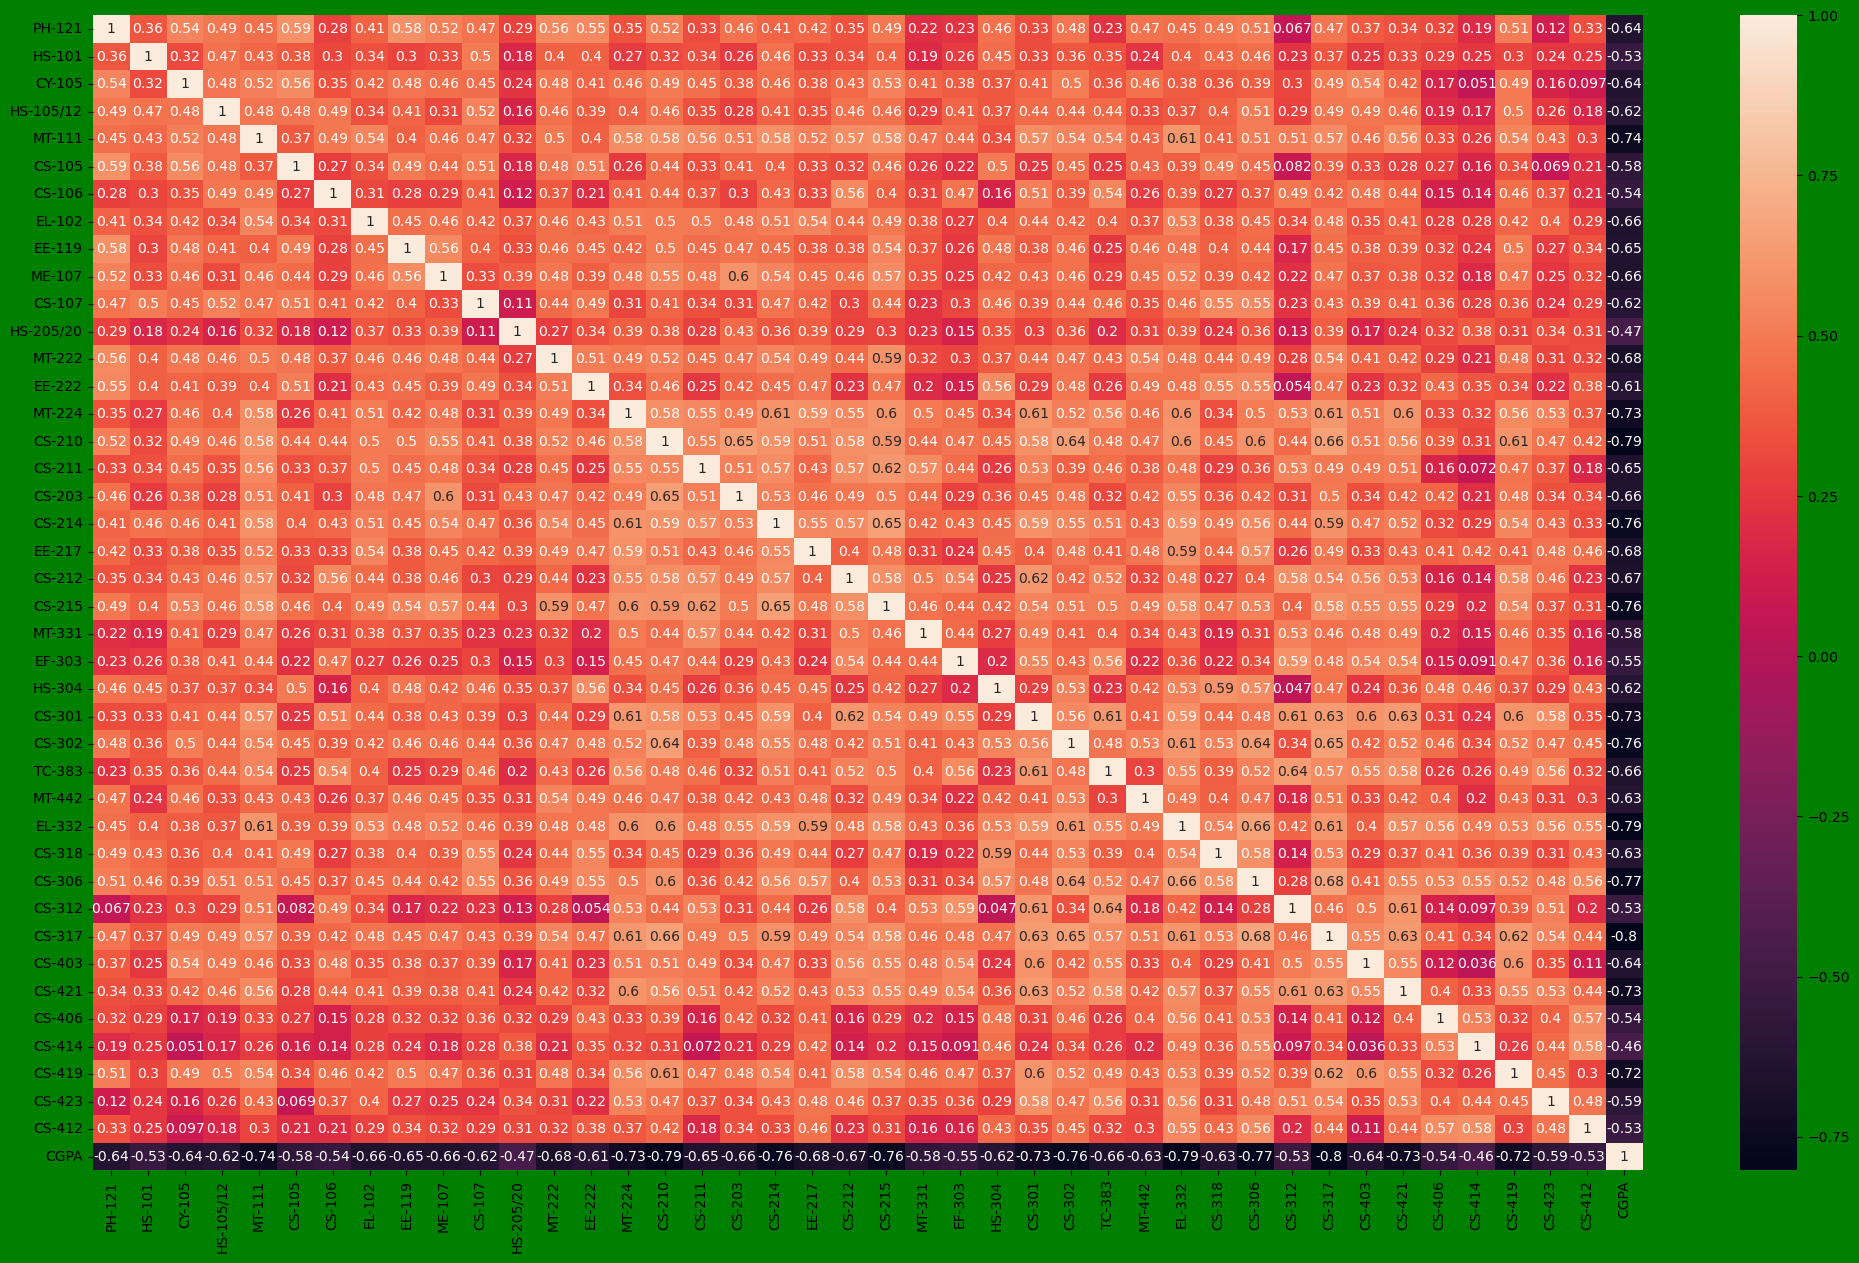

In [66]:
#Perform a correlation on the data to see nos of features that are correlated using heatmap

plt.figure(figsize=[25,15],facecolor='green')
sns.heatmap(df.corr(),annot=True)

* Split the dataset and commence Model training

In [68]:
#Define features (X) and target variable (y)

X = df.drop(['CGPA'], axis=1)
y = df['CGPA']

#Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)     #Random Forest Regressor model

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

* Model Evaluation 

In [71]:
#Evaluate the model and display the metrics

lr = LinearRegression()
model = lr.fit(X_train, y_train)
print(lr.score(X_test, y_test)) 

0.9842401466540196


In [61]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.01187221602142855
R-squared: 0.9619117098927571


* CGPA Prediction

In [73]:
predictions = lr.predict(X_test)

Text(0, 0.5, 'Predicted Grade')

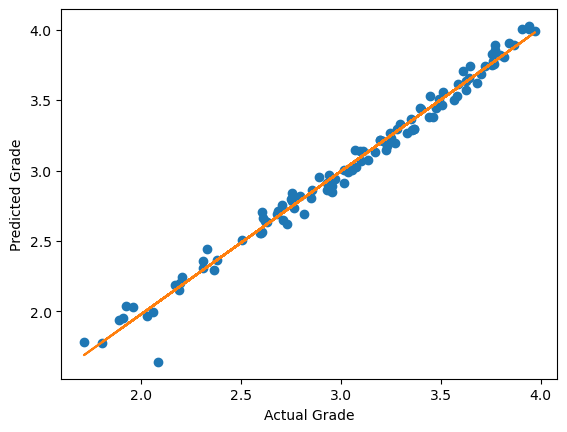

In [74]:
plt.plot(y_test, predictions, 'o')
m, b = np.polyfit(y_test,predictions, 1)
plt.plot(y_test, m*y_test + b)
plt.xlabel("Actual Grade")
plt.ylabel("Predicted Grade")

In [ ]:
#Create a user input for CGPA prediction and Dataframe as:

user_input = {}  

for column in df.columns:
    if column != 'CGPA':
        user_input[column] = int(input(f"Enter value for {column}: "))

user_input_df = pd.DataFrame([user_input])

grade_predicted = lr.predict(user_input_df)

print("Predicted Grade:", grade_predicted[0])

=======xxxxxxxx===============xxxxxxxxxxxxx=================